In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cluster.csv to cluster.csv


In [3]:
data = pd.read_csv("cluster.csv")
print(data.head())

     X   Y
0  185  72
1  170  56
2  168  60
3  179  68
4  182  72


<Axes: xlabel='X', ylabel='Y'>

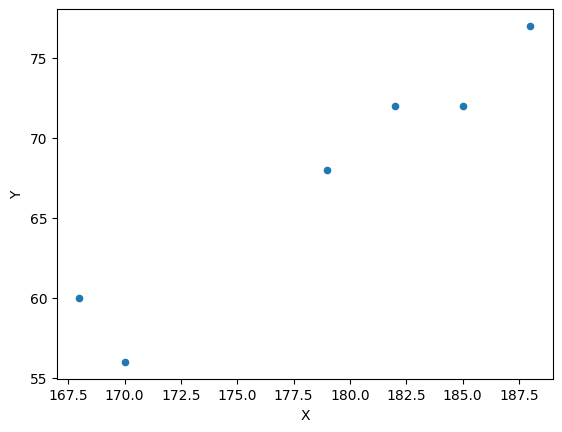

In [4]:
data.plot(x="X", y="Y", kind="scatter")

In [57]:
def cluster(dataFrame, numClasses, distance):
  x = data.values[:,0]
  y = data.values[:,1]
  assignmentData = []
  classes = np.arange(1, (numClasses+1))
  xCentroids = []
  yCentroids= []
  initialLimit = numClasses
  limit = len(x)

  setInitialPoints(x, y, xCentroids, yCentroids, assignmentData, classes, numClasses)

  for i in range(initialLimit, limit):
    indexType = evalGroup(x[i], y[i], xCentroids, yCentroids, numClasses, distance)
    assignmentData.append(classes[indexType])
    newXCentroid, newYCentroid = evalNewCentroid(x, y, xCentroids, yCentroids, assignmentData, classes[indexType])
    xCentroids[indexType] = newXCentroid
    yCentroids[indexType] = newYCentroid

  coefficent = pearsonCoefficient(x, y)

  centroids = { "X": xCentroids, "Y": yCentroids }

  dataFrame["Class"] = assignmentData

  return centroids, xCentroids, yCentroids, coefficent

In [6]:
def setInitialPoints(xValues, yValues, xCentroids, yCentroids, assignmentData, classes, numClasses):
  for i in range(numClasses):
    assignmentData.append(classes[i])
    xCentroids.append(xValues[i])
    yCentroids.append(yValues[i])

In [32]:
def evalGroup(xPos, yPos, xCentroids, yCentroids, classes, distance):
  distanceCluster = []

  for i in range(classes):
    if distance == "manhattan":
      distanceCluster.append(manhattanDistance(xPos, yPos, xCentroids[i], yCentroids[i]))
    elif distance == "cosine":
      distanceCluster.append(cosineSimilarity(xPos, yPos, xCentroids[i], yCentroids[i]))
    elif distance == "euclidean":
      distanceCluster.append(euclideanDistance(xPos, yPos, xCentroids[i], yCentroids[i]))

  return distanceCluster.index(min(distanceCluster))

In [41]:
def euclideanDistance(xPosition, yPosition, xCentroid, yCentroid):
  return np.sqrt((xPosition - xCentroid)**2 + (yPosition - yCentroid)**2)

In [42]:
def manhattanDistance(xPosition, yPosition, xCentroid, yCentroid):
  return (abs(xPosition - xCentroid) + abs(yPosition - yCentroid))

In [43]:
def cosineSimilarity(xPosition, yPosition, xCentroid, yCentroid):
  origin = [0, 0]
  moduleProduct = []

  dotProduct = (xPosition * xCentroid) + (yPosition * yCentroid)

  moduleProduct.append(euclideanDistance(xPosition, yPosition, origin[0], origin[1]))
  moduleProduct.append(euclideanDistance(xCentroid, yCentroid, origin[0], origin[1]))

  result = (1 - (dotProduct / (moduleProduct[0] * moduleProduct[1])))

  return result

In [44]:
def evalNewCentroid(xValues, yValues, xCentroids, yCentroids, assignmentData, classValue):
  indexValues = []
  sumX = 0
  sumY = 0

  for i in range(len(assignmentData)):
    if assignmentData[i] == classValue:
      indexValues.append(i)

  for j in range(len(indexValues)):
    sumX += xValues[indexValues[j]]
    sumY += yValues[indexValues[j]]

  xMean = round(sumX/len(indexValues), 2)
  yMean = round(sumY/len(indexValues), 2)

  return xMean, yMean

In [56]:
def pearsonCoefficient(x, y):
  xMean = (sum(x)/len(x))
  yMean = (sum(y)/len(y))

  diffX = []
  diffY = []
  diffX2 = []
  diffY2 = []
  dotDiffXY = []


  for i in range(len(x)):
    diffX.append((x[i]-xMean))
    diffY.append((y[i]-yMean))
    diffX2.append((x[i]-xMean)**2)
    diffY2.append((y[i]-yMean)**2)

  for j in range(len(x)):
    dotDiffXY.append(diffX[j]*diffY[j])

  firstComponent = sum(dotDiffXY)
  secondComponent = np.sqrt(sum(diffX2)*sum(diffY2))

  result = 1 - ((firstComponent)/(secondComponent))

  return result

In [45]:
def createDataFrame(data):
  return pd.DataFrame(data=data)

In [46]:
def evalColor(assignmentGroup):
  colors = []

  for i in range(len(assignmentGroup)):
    if (assignmentGroup[i] == 1):
      colors.append("red")
    elif (assignmentGroup[i] == 2):
      colors.append("blue")
    elif (assignmentGroup[i] == 3):
      colors.append("green")
    elif (assignmentGroup[i] == 4):
      colors.append("yellow")
    elif (assignmentGroup[i] == 5):
      colors.append("purple")
    else:
      colors.append("gray")

  return colors

In [51]:
def getTitlePlot(distance):
  if distance == "manhattan":
    return "Manhattan Distance"
  elif distance == "cosine":
    return "Cosine Distance"
  elif distance == "euclidean":
    return "Euclidean Distance"

In [58]:
centroids, xCentroidGroup, yCentroidGroup, pearsonCoeff = cluster(data, 2, "cosine")
dataCentroids = createDataFrame(centroids)
dotColor = evalColor(data.values[:,2])

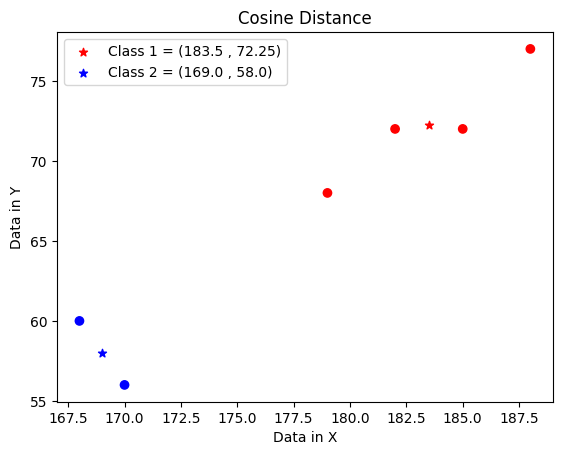

In [59]:
plt.scatter(data.values[:,0], data.values[:,1], c=dotColor)
plt.scatter(xCentroidGroup[0], yCentroidGroup[0], c="red", marker="*", label="Class 1 = ({x} , {y})".format(x=xCentroidGroup[0], y=yCentroidGroup[0]))
plt.scatter(xCentroidGroup[1], yCentroidGroup[1], c="blue", marker="*", label="Class 2 = ({x} , {y})".format(x=xCentroidGroup[1], y=yCentroidGroup[1]))
plt.title(getTitlePlot("cosine"))
plt.xlabel("Data in X")
plt.ylabel("Data in Y")
plt.legend()

In [62]:
print("Final Data Set")
print(data)
print("-----------------------")
print("Centroids Data Set")
print(dataCentroids)
print("-----------------------")
print("Coeficiente de Pearson entre X y Y: ", round(pearsonCoeff, 3))

Final Data Set
     X   Y  Class
0  185  72      1
1  170  56      2
2  168  60      2
3  179  68      1
4  182  72      1
5  188  77      1
-----------------------
Centroids Data Set
       X      Y
0  183.5  72.25
1  169.0  58.00
-----------------------
Coeficiente de Pearson entre X y Y:  0.035
